In [1]:
from deeper.deeper_utils import wrap_deeper
from explanation.deepmatcher_utils import wrapDm
from explanation.mojito2 import explainSamples
import pandas as pd
import deepmatcher as dm
from keras.models import load_model
from deeper.DeepER import init_embeddings_index,init_embeddings_model

Using TensorFlow backend.


In [3]:
predict_fn_deepmatcher = lambda data,model,ignore: wrapDm(data,model,ignore_columns=ignore)

In [4]:
model = dm.MatchingModel(attr_summarizer='hybrid')
model.load_state('models/beeradvo_ratebeer_hybrid.pth')

In [5]:
augmented_test = pd.read_csv('datasets/beeradvo_ratebeer/augmented_test.csv')
beeradvo = pd.read_csv('datasets/beeradvo_ratebeer/Beeradvo.csv',dtype=str)
ratebeer = pd.read_csv('datasets/beeradvo_ratebeer/Ratebeer.csv',dtype=str)

In [11]:
posrank_deepmatcher,flippedPos_deepmatcher = explainSamples(augmented_test,[beeradvo,ratebeer],model,
                                                           predict_fn_deepmatcher,1,1)

100%|██████████| 38/38 [00:06<00:00,  5.67it/s]


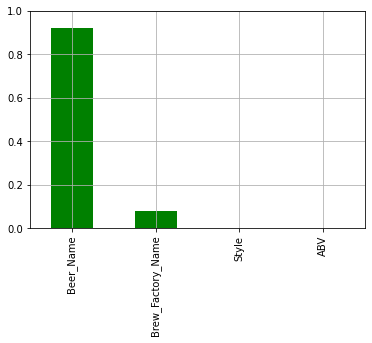

In [12]:
posrank_deepmatcher.plot.bar(color='green',ylim=(0,1),grid=True)

In [14]:
negrank_deepmatcher,flippedNeg_deepmatcher = explainSamples(augmented_test,[beeradvo,ratebeer],model,
                                                           predict_fn_deepmatcher,0,1)

100%|██████████| 38/38 [00:06<00:00,  5.74it/s]


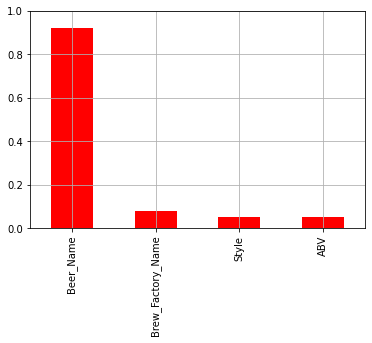

In [15]:
negrank_deepmatcher.plot.bar(color='red',ylim=(0,1),grid=True)

In [17]:
flippedpos_onname = flippedPos_deepmatcher[flippedPos_deepmatcher.alteredAttributes==('Beer_Name',)]

In [22]:
from collections import defaultdict
def countTokens(str_l):
    tokens_occ = defaultdict(int)
    for beername in str_l:
        tokens = beername.split()
        for token in tokens:
            tokens_occ[token.lower()] +=1
    filtered_tokens_occ = {k:v for (k,v) in tokens_occ.items() if v>=5}
    return filtered_tokens_occ

In [23]:
countTokens(flippedpos_onname.ltable_Beer_Name)

{'red': 16, 'ale': 27, 'amber': 14, 'waves': 5}

In [24]:
countTokens(flippedpos_onname.rtable_Beer_Name)

{'red': 16, 'ale': 27, 'amber': 14, 'waves': 5}

## Test possible biases

In [27]:
train = pd.read_csv('datasets/beeradvo_ratebeer/train.csv')
test = pd.read_csv('datasets/beeradvo_ratebeer/test.csv')
validation = pd.read_csv('datasets/beeradvo_ratebeer/validation.csv')
allsamples = pd.concat([train,test,validation],ignore_index=True)
positives = allsamples[allsamples.label==1]
len(positives)

68

In [32]:
import numpy as np
predictions = predict_fn_deepmatcher(positives,model,['id','label'])
predicted_pos = np.count_nonzero(np.argmax(predictions,axis=1)==1)
predicted_pos

68

In [33]:
positives_c = positives.copy()
positives_c['ltable_Beer_Name'] = positives.ltable_Beer_Name+" amber ale"
positives_c['rtable_Beer_Name'] = positives.rtable_Beer_Name+" amber ale"

In [ ]:
predictions_c = predict_fn_deepmatcher(positives_c,model,['id','label'])
predicted_pos = np.count_nonzero(np)